## Importing Necessary Libraries

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [14]:
df=pd.read_csv('breast_cancer.csv',header=None)
print(df.head())

        0   1   2   3   4   5   6   7   8   9   10
0  1000025   5   1   1   1   2   1   3   1   1   2
1  1002945   5   4   4   5   7  10   3   2   1   2
2  1015425   3   1   1   1   2   2   3   1   1   2
3  1016277   6   8   8   1   3   4   3   7   1   2
4  1017023   4   1   1   3   2   1   3   1   1   2


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       699 non-null    int64 
 1   1       699 non-null    int64 
 2   2       699 non-null    int64 
 3   3       699 non-null    int64 
 4   4       699 non-null    int64 
 5   5       699 non-null    int64 
 6   6       699 non-null    object
 7   7       699 non-null    int64 
 8   8       699 non-null    int64 
 9   9       699 non-null    int64 
 10  10      699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [16]:
df.describe()

,0,1,2,3,4,5,7,8,9,10
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


### There are '?' for missing values as mentioned in the README.md file

In [17]:
missing_counts=(df== '?').sum()
print(missing_counts)

0      0
1      0
2      0
3      0
4      0
5      0
6     16
7      0
8      0
9      0
10     0
dtype: int64


## Replacing missing values

In [32]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1].values

In [33]:
df.replace('?',np.nan,inplace=True)
X=np.array(X)
imputer=SimpleImputer(missing_values =np.nan,strategy='mean')
imputer.fit(X[:,6:7])
X[:,6:7]=imputer.transform(X[:,6:7])
X=df.iloc[:,:-1]
y=df.iloc[:,-1].values

In [36]:
missing_counts=(df == '?').sum()
print(missing_counts)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64


## Making data more meaningful by adding column names

In [37]:
column_names = [
    'Sample code number',
    'Clump Thickness',
    'Uniformity of Cell Size',
    'Uniformity of Cell Shape',
    'Marginal Adhesion',
    'Single Epithelial Cell Size',
    'Bare Nuclei',
    'Bland Chromatin',
    'Normal Nucleoli',
    'Mitoses',
    'Class'
]
df.columns = column_names
print("DataFram with meaningful column names:")
print(df.head())

DataFram with meaningful column names:
   Sample code number  Clump Thickness  Uniformity of Cell Size  \
0             1000025                5                        1   
1             1002945                5                        4   
2             1015425                3                        1   
3             1016277                6                        8   
4             1017023                4                        1   

   Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                         1                  1                            2   
1                         4                  5                            7   
2                         1                  1                            2   
3                         8                  1                            3   
4                         1                  3                            2   

  Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0           1    

## Exploratory Data Analysis

<Axes: >

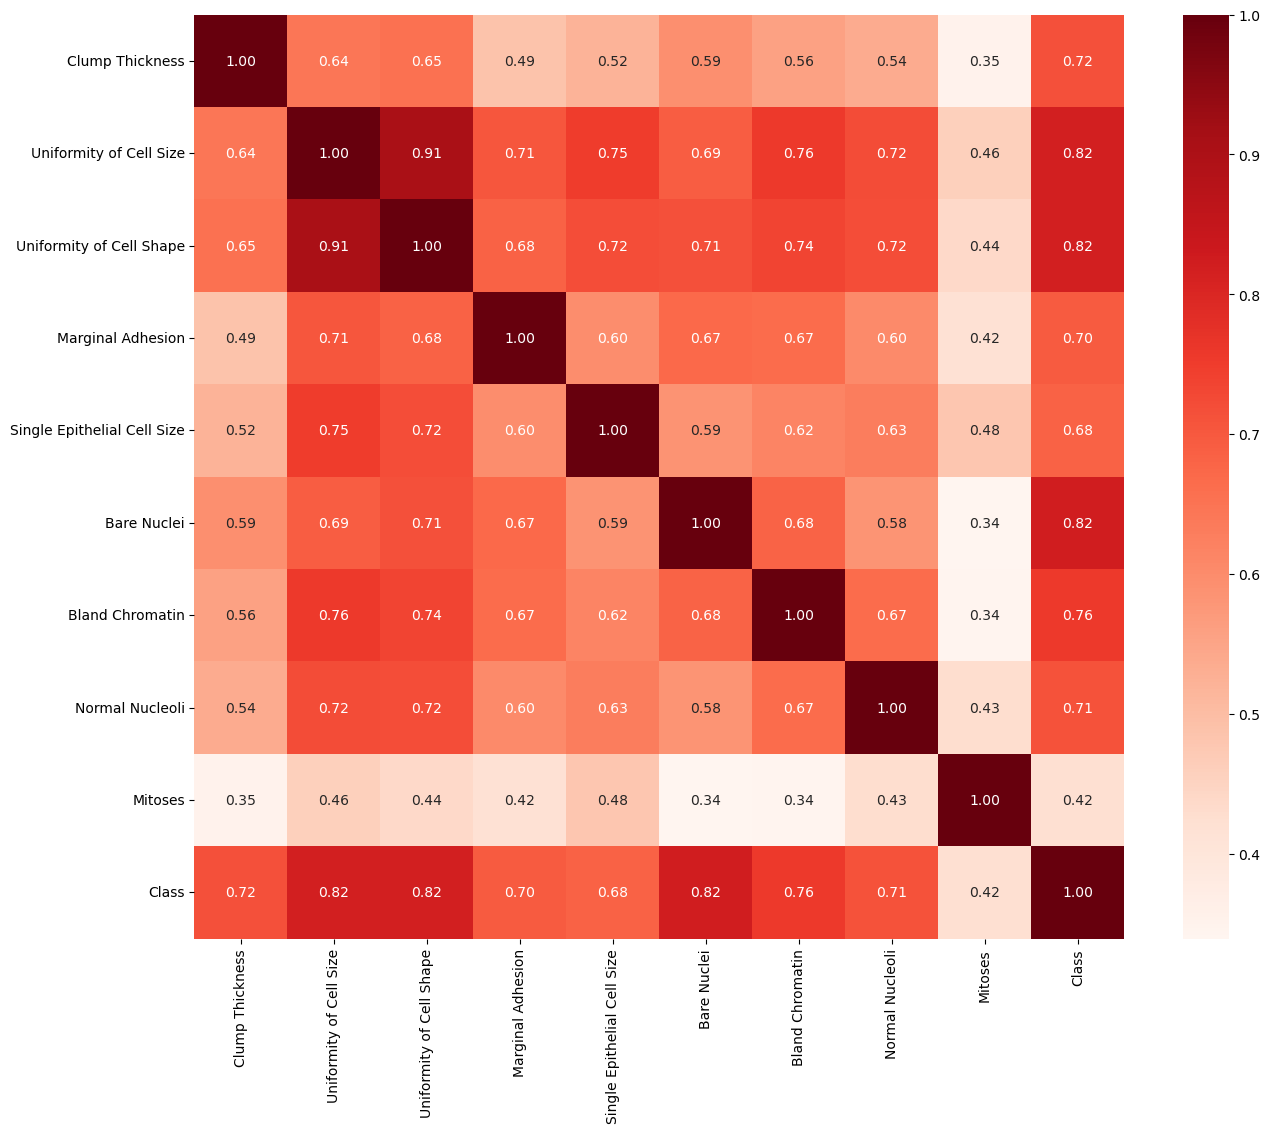

In [44]:
plt.figure(figsize=(15,12))
correlation=df.corr()
columns_to_drop=['Sample code number']
reduced_correlation = correlation.drop(columns=columns_to_drop, index=columns_to_drop)
sns.heatmap(reduced_correlation,fmt='.2f',annot=True,cmap='Reds',cbar=True)

### We see high correlation in the columns (Uniformity of cell size, uniformity of cell shape,bare nuclei,bland chromatin)
### We also see extremely high correlation between uniformity of cell size and uniformity of cell shape which results in the model being unstable

In [7]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [8]:
np.set_printoptions(precision=2)
print(X[:,6])

[10.0 2.0 4.0 1.0 10.0 10.0 1.0 1.0 1.0 1.0 1.0 3.0 3.0 9.0 1.0 1.0 1.0
 10.0 1.0 10.0 7.0 1.0 3.5483870967741935 1.0 7.0 1.0 1.0 1.0 1.0 1.0 1.0
 5.0 1.0 1.0 1.0 1.0 1.0 10.0 7.0 3.5483870967741935 3.0 10.0 1.0 1.0 1.0
 9.0 1.0 1.0 8.0 3.0 4.0 5.0 8.0 8.0 5.0 6.0 1.0 10.0 2.0 3.0 2.0 8.0 2.0
 1.0 2.0 1.0 10.0 9.0 1.0 1.0 2.0 1.0 10.0 4.0 2.0 1.0 1.0 3.0 1.0 1.0 1.0
 1.0 2.0 9.0 4.0 8.0 10.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 6.0 10.0
 5.0 5.0 1.0 3.0 1.0 3.0 10.0 10.0 1.0 9.0 2.0 9.0 10.0 8.0 3.0 5.0 2.0
 10.0 3.0 2.0 1.0 2.0 10.0 10.0 7.0 1.0 10.0 1.0 10.0 1.0 1.0 1.0 10.0 1.0
 1.0 2.0 1.0 1.0 1.0 3.5483870967741935 1.0 1.0 5.0 5.0 1.0
 3.5483870967741935 8.0 2.0 1.0 10.0 1.0 10.0 5.0 3.0 1.0 10.0 1.0 1.0
 3.5483870967741935 10.0 10.0 1.0 1.0 3.0 3.5483870967741935 2.0 10.0 1.0
 1.0 1.0 1.0 1.0 1.0 10.0 10.0 10.0 1.0 1.0 1.0 10.0 1.0 1.0 1.0 10.0 10.0
 1.0 8.0 10.0 8.0 1.0 8.0 10.0 1.0 1.0 1.0 1.0 7.0 1.0 1.0 1.0 10.0 10.0
 1.0 1.0 1.0 10.0 5.0 1.0 1.0 1.0 10.0 8.0 1.0 10.0 10.0

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train[:,1:]=sc.fit_transform(X_train[:,1:])
print(X_train[1:10,1:])

In [9]:

classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

C:\Users\anand\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [10]:
y_pred=classifier.predict(X_test)
print(y_pred)

[4 2 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 2 4 4 4 2 4 4 4 2 2 4 2 2 2 2 2 2
 4 2 2 2 2 2 4 4 4 2 4 2 4 2 2 2 4 2 2 2 2 2 4 4 2 4 4 2 4 4 2 4 4 2 2 4 2
 2 2 4 2 4 2 4 2 2 2 2 2 4 2 2 4 4 4 2 4 2 4 2 2 2 2 2 4 4 4 2 2 4 2 2 2 4
 4 2 4 4 2 4 2 2 4 2 2 4 4 4 2 2 4 2 2 4 4 2 4 2 2 2 4 4 4]


In [11]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[80  5]
 [ 3 52]]


Text(50.722222222222214, 0.5, 'Malignant                         Benign')

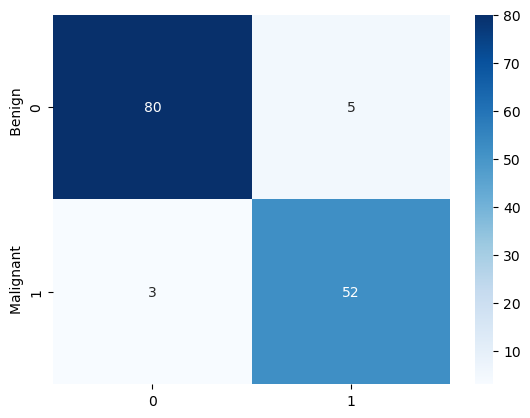

In [12]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',cbar=True)

plt.ylabel('Malignant                         Benign')

In [13]:
(80+52)/140

0.9428571428571428

In [14]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:-.2f} %".format(accuracies.std()*100))

Accuracy: 93.73 %
Standard Deviation: 2.91 %


C:\Users\anand\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\anand\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also 

In [15]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=60,criterion='entropy',random_state=0)
forest.fit(X_train,y_train)

,n_estimators,60
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [16]:
cmd=confusion_matrix(y_test,forest.predict(X_test))
accuracy=cross_val_score(estimator=forest,X=X_train,y=y_train,cv=10)
print("Accuracy:{:.2f}%".format(accuracy.mean()*100))

Accuracy:96.24%


<Axes: >

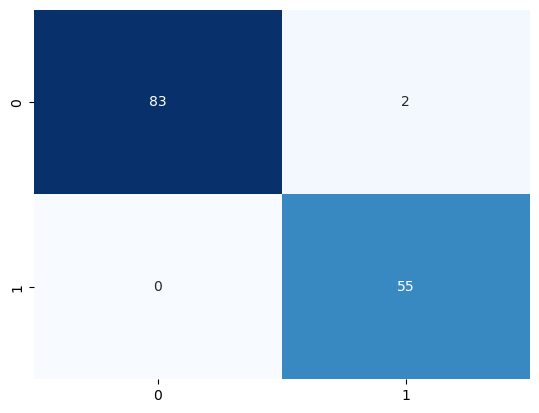

In [17]:
cmf=confusion_matrix(y_test,forest.predict(X_test))
from sklearn.metrics import accuracy_score
accuracy_score(y_test,forest.predict(X_test))
sns.heatmap(cmf,annot=True,fmt='d',cmap='Blues',cbar=False)

In [18]:
from sklearn.tree import DecisionTreeClassifier
decision=DecisionTreeClassifier(criterion='entropy',random_state=0)
decision.fit(X_train,y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [19]:
cmd=confusion_matrix(y_test,decision.predict(X_test))
accuracy=cross_val_score(estimator=decision,X=X_train,y=y_train,cv=10)
print("Accuracy:{:.2f}%".format(accuracy.mean()*100))

Accuracy:94.98%


In [20]:
accuracy_score(y_test,decision.predict(X_test))

0.9357142857142857

In [21]:
from sklearn.svm import SVC
clf=SVC(kernel='linear',random_state=0)
clf.fit(X_train,y_train)


,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [ ]:
cmt=confusion_matrix(y_test,decision.predict(X_test))
accuracy=cross_val_score(estimator=clf,X=X_train,y=y_train,cv=10)
print("Accuracy:{:.2f}%".format(accuracy.mean()*100))
print(cmf)

In [ ]:
accuracy_score(y_test,clf.predict(X_test))